In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5,1,'Histogram of insurance charges')

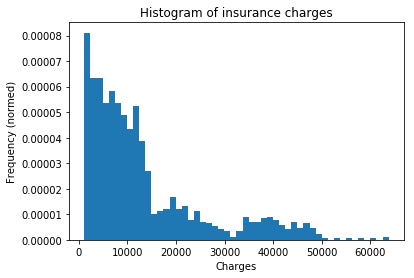

In [11]:
df.charges.plot.hist(bins = 50, normed = True)
plt.xlabel("Charges")
plt.ylabel("Frequency (normed)")
plt.title("Histogram of insurance charges")

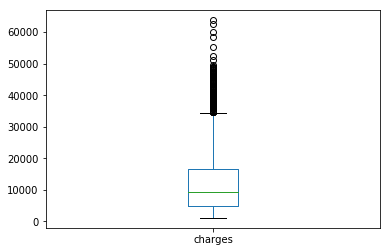

In [12]:
df.charges.plot.box()

In [23]:
np.percentile?

In [28]:
def find_outliers(x):
    q1, q2, q3 = np.percentile(x, [25, 50, 75])
    iqr = q3 - q1
    upper_whisker = np.min([np.max(x), q3 + 1.5 * iqr])
    lower_whisker = np.max([np.min(x), q1 - 1.5 * iqr])
    print("iqr: ", iqr, 
          "\nupper whisker: ", upper_whisker, 
          "\nlower whisker: ", lower_whisker,
         "\n outliers")
    return x[(x > upper_whisker) | (x<lower_whisker)]
    
    
find_outliers(df.charges)   

iqr:  11899.625365 
upper whisker:  34489.350562499996 
lower whisker:  1121.8739 
 outliers


14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
34      51194.55914
38      39774.27630
39      48173.36100
49      38709.17600
53      37742.57570
55      47496.49445
82      37165.16380
84      39836.51900
86      43578.93940
94      47291.05500
109     47055.53210
123     39556.49450
146     40720.55105
158     36950.25670
161     36149.48350
175     48824.45000
185     43753.33705
203     37133.89820
223     34779.61500
240     38511.62830
242     35160.13457
251     47305.30500
252     44260.74990
254     41097.16175
256     43921.18370
           ...     
1062    48970.24760
1070    39871.70430
1078    34672.14720
1090    41676.08110
1096    44641.19740
1111    41949.24410
1117    36124.57370
1118    38282.74950
1122    46661.44240
1124    40904.19950
1139    36898.73308
1146    52590.82939
1152    40941.28540
1156    39722.74620
1186    37465.34375
1206    36910.60803
1207    38415.47400
1218    41661.60200
1230    60021.39897


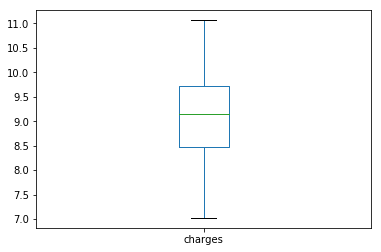

In [29]:
np.log(df.charges).plot.box()

Text(0.5,1,'Frequency plot by Gender')

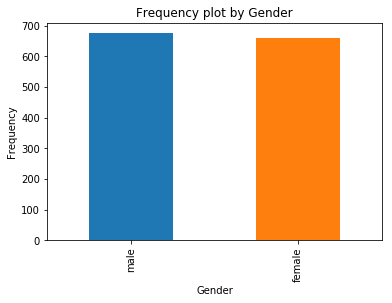

In [33]:
df.sex.value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Frequency plot by Gender")

Text(0.5,1,'Frequency plot by region')

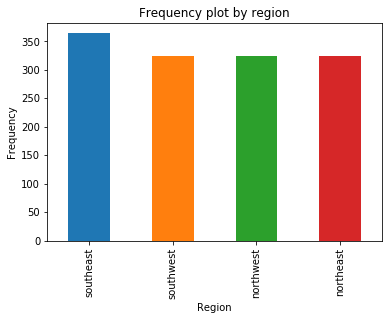

In [36]:
df.region.value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot by region")

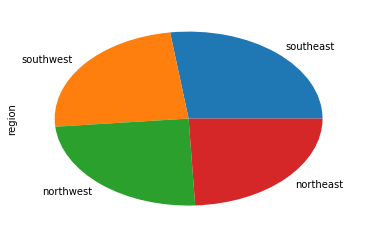

In [37]:
df.region.value_counts().sort_values(ascending = False).plot.pie()

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


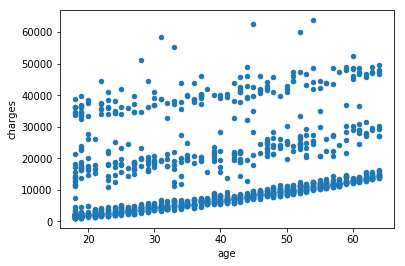

In [40]:
df.plot.scatter("age", "charges")

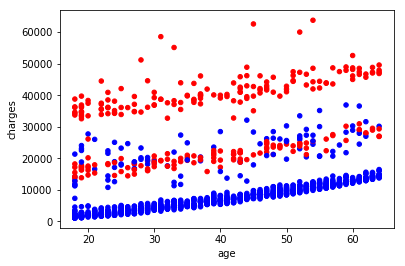

In [44]:
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("age", "charges", color = colors)

Text(0.5,1,'Mean charges by smoker')

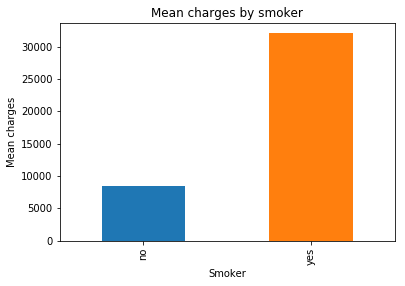

In [47]:
df.groupby("smoker").charges.mean().plot.bar()
plt.xlabel("Smoker")
plt.ylabel("Mean charges")
plt.title("Mean charges by smoker")

In [53]:
import seaborn as sns

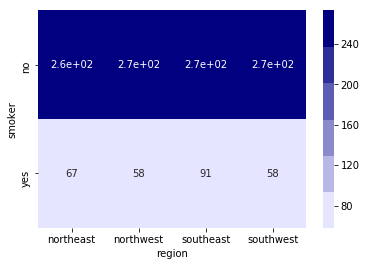

In [59]:
agg = df.groupby(["smoker", "region"]).smoker.count().unstack()
sns.heatmap(agg, annot=True, cmap = sns.light_palette("navy"))